# **LIMPIEZA DE DATOS CON PYTHON**

---


Importamos los paquetes que vamos a usar


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import  SimpleImputer

Cargamos los datos


In [49]:
data=pd.read_csv('train.csv')

Recordemos algunos métodos útiles de los dataframe de pandas


In [50]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Para ver una informacion general sobre los atributos del dataframe


In [4]:
data.info()

NameError: name 'data' is not defined

Para obtener una descrpcion estadistica de las columnas numericas


In [52]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Para obtener una descripcion de las categoricas


In [53]:
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


Para ver el tamaño del dataset


In [54]:
data.shape

(891, 12)

Para cambiar el tipo de dato de una columna


In [55]:
data['Pclass']=data['Pclass'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [56]:
data['Pclass']=data['Pclass'].astype(int)

## **COMPROBACION DE OUTLIERS**


De forma visual


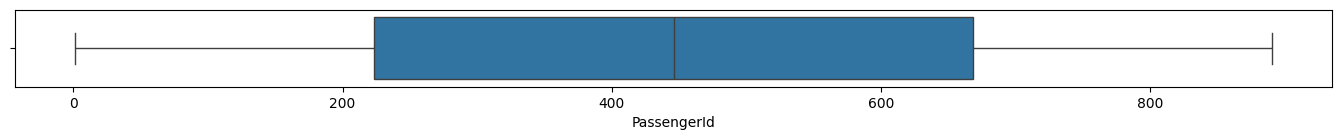

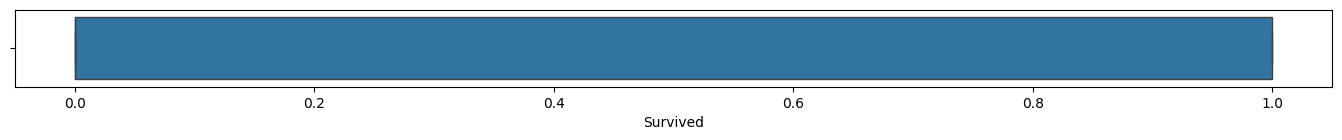

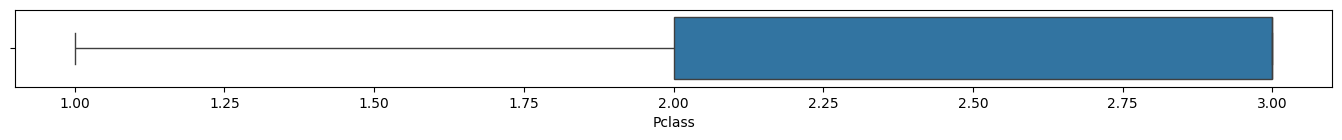

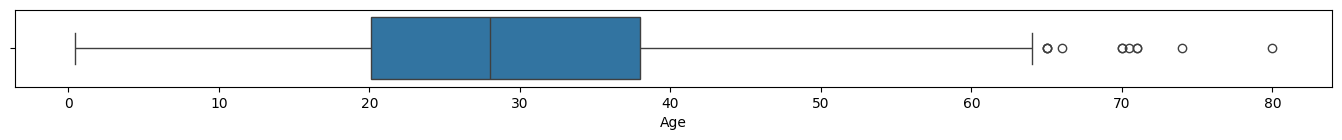

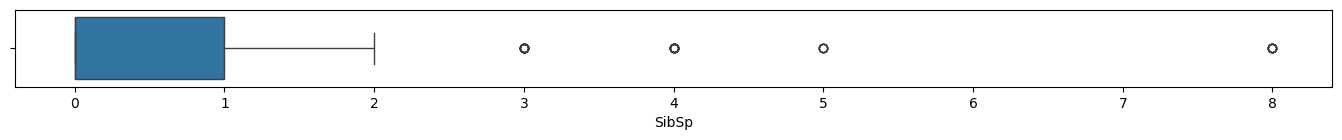

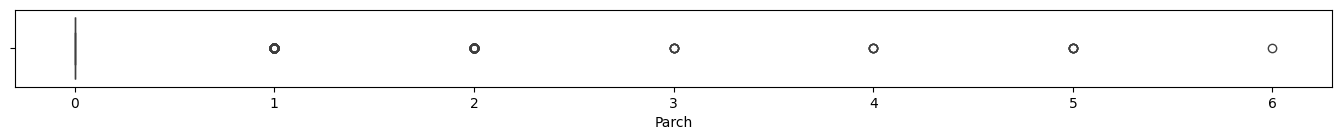

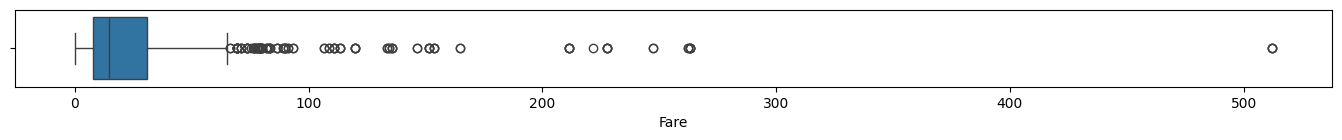

In [57]:
num_cols=data.select_dtypes(include='number').columns

for col in num_cols:
  plt.figure(figsize=(17,1))
  sns.boxplot(data=data[num_cols], x=col)

Numericamente


In [5]:
#Nº de Outliers usando rango IQR
outliers={}

for col in num_cols:
  Q1 = np.percentile(data[col], 25)
  Q3 = np.percentile(data[col], 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers[col]= (data[col] > upper_bound).sum() + (data[col]< lower_bound).sum()

print(outliers)

NameError: name 'num_cols' is not defined

In [59]:
#Nº de Outliers usando 3 std
outliers={}
for col in num_cols:
  mean=data[col].mean()
  std=data[col].std()

  outliers[col] = (data[col] > (mean + 3 *std)).sum() + (data[col] < (mean - 3 *std)).sum()

print(outliers)

{'PassengerId': np.int64(0), 'Survived': np.int64(0), 'Pclass': np.int64(0), 'Age': np.int64(2), 'SibSp': np.int64(30), 'Parch': np.int64(15), 'Fare': np.int64(20)}


<Axes: xlabel='Fare', ylabel='Count'>

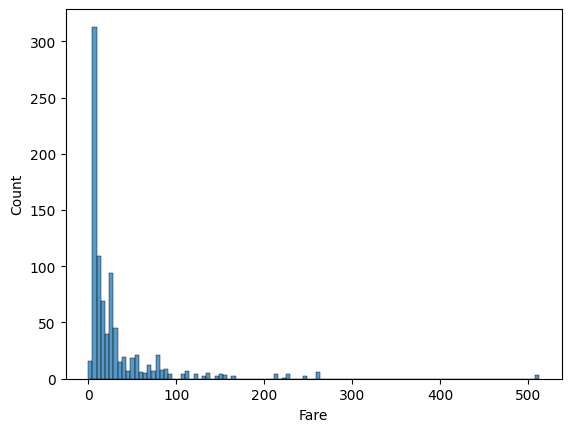

In [60]:
sns.histplot(data['Fare'])

Veamos ahora los diferentes metodos de trabajar con nulos


In [61]:
data.isna().sum() #Detect missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Eliminando los nulos


In [62]:
df_sin_nulos=data.dropna() #I delete the missing values of the dataframe
df_sin_nulos.isna().sum() #Detect missing values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
data.drop('Age',axis=1,inplace=True) #Successfully deleted the column
data.drp

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


Imputando valores


<Axes: xlabel='Fare', ylabel='Count'>

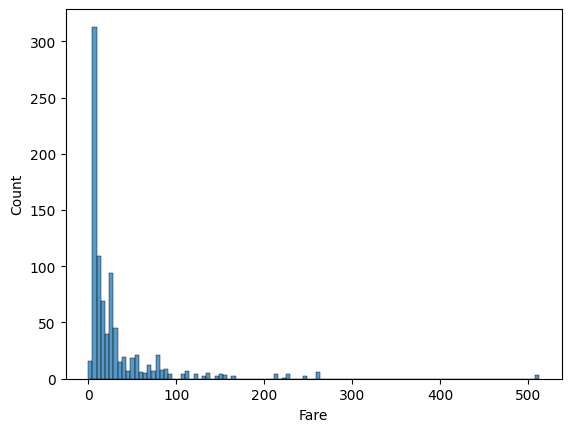

In [65]:
sns.histplot(data['Fare'])

In [68]:
impute=SimpleImputer(strategy='median')

print('Mediana inicial: ', data['Fare'].median())

salida=impute.fit_transform(data[['Fare']])

salida=pd.DataFrame(salida)

print('\nNulos en los nuevos datos: ',salida.isna().sum())
print('\nMediana nuevos datos: ',salida.median())


Mediana inicial:  14.4542

Nulos en los nuevos datos:  0    0
dtype: int64

Mediana nuevos datos:  0    14.4542
dtype: float64


Usando una constante(Por ejemplo para columnas categoricas)


In [ ]:
data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [69]:
impute=SimpleImputer(strategy='constant',fill_value='S')

print('Recuento inicial: ', data['Embarked'].value_counts())

salida=impute.fit_transform(data[['Embarked']])

salida=pd.DataFrame(salida)

print('\nNulos en los nuevos datos: ',salida.isna().sum())
print('\Recuento nuevos datos: ',salida.value_counts())

Recuento inicial:  Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Nulos en los nuevos datos:  0    0
dtype: int64
\Recuento nuevos datos:  0
S    646
C    168
Q     77
Name: count, dtype: int64


# **PARTE 2 LIMPIEZA**

---


Comprender las variable


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 69.7+ KB


Descripción de cada columna:

- Survived : Sobrevivio o no? 0-1
- Pclass : En que clase viajaba
- Name: Nombre del pasajero
- Sex: Es hombre o mujer?
- Age: Edad del pasajero
- SibSp: Número de hermanos/cónyuges a bordo del Titanic
- Parch: Número de padres/hijos a bordo del Titanic
- Ticket: Número de boleto
- Fare: Tarifa del pasajero
- Embarked: Puerto de embarque


### Varianza en los datos


In [46]:
data.var    

<bound method DataFrame.var of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex  SibSp  Parch  \
0                              Braund, Mr. Owen Harris    male      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                               Heikkinen, Miss. Laina  female      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                             Allen, Mr. William Henry    male      0      0   
..                              

In [23]:
cat_cols=data.select_dtypes(include='O').columns

for c in cat_cols:
  print('\nColumna :',c)
  print(data[c].value_counts())


Columna : Name
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64

Columna : Sex
Sex
male      577
female    314
Name: count, dtype: int64

Columna : Ticket
Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450           

### Matriz de correlación


<Axes: >

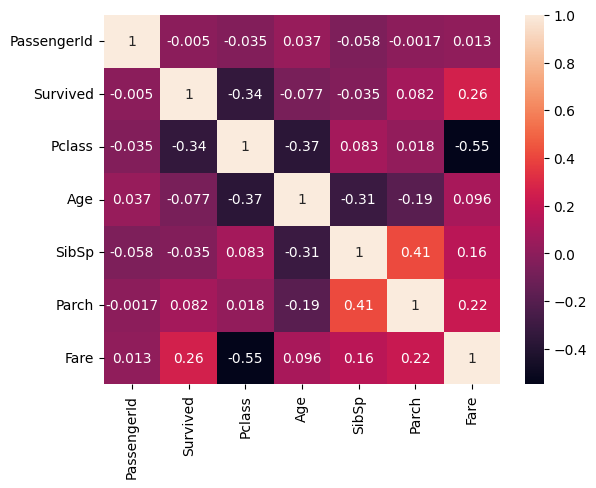

In [24]:
num_cols=data.select_dtypes(include='number').columns

matriz=data[num_cols].corr()

sns.heatmap(matriz,annot=True)

Vemos que si incluimos la variable objetivo podemos ver como de relacionadas estan el resto de variables con esta.


### Exploracion visual



Visualizaciones para la columna:  PassengerId


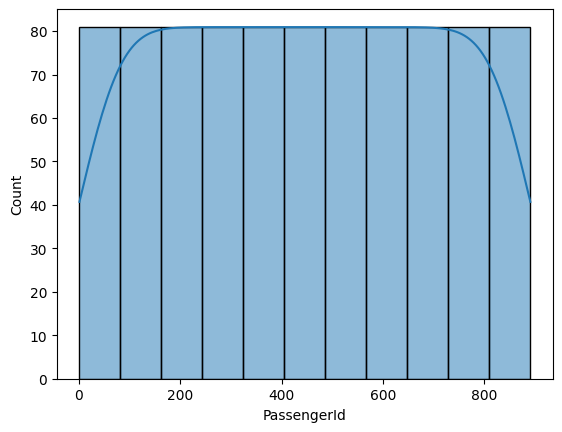

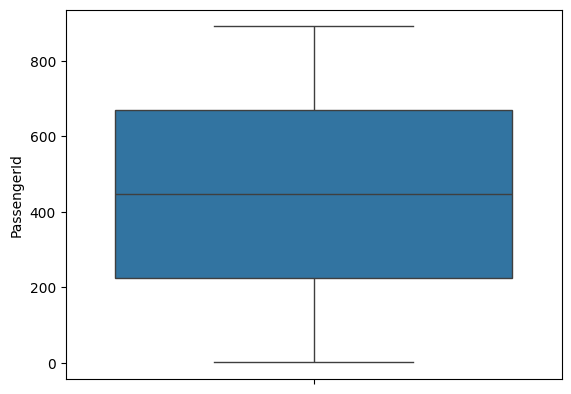


Visualizaciones para la columna:  Survived


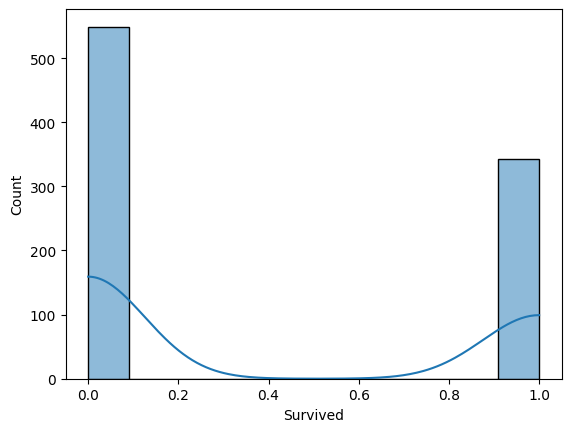

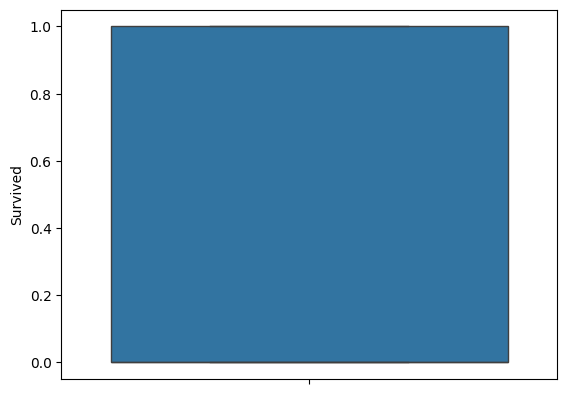


Visualizaciones para la columna:  Pclass


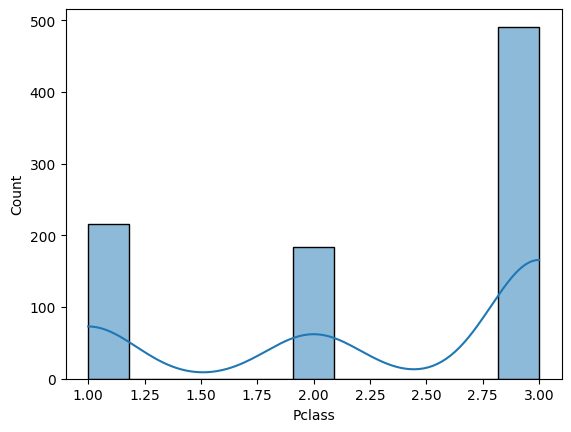

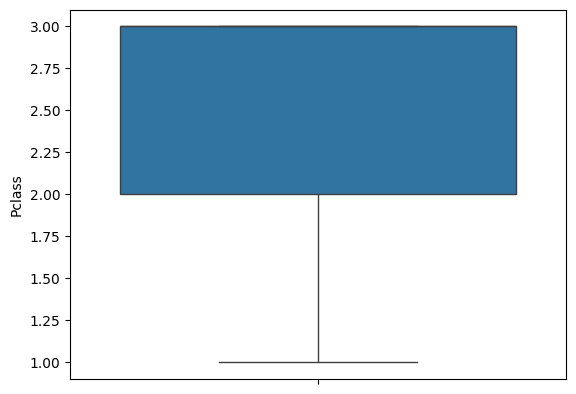


Visualizaciones para la columna:  Age


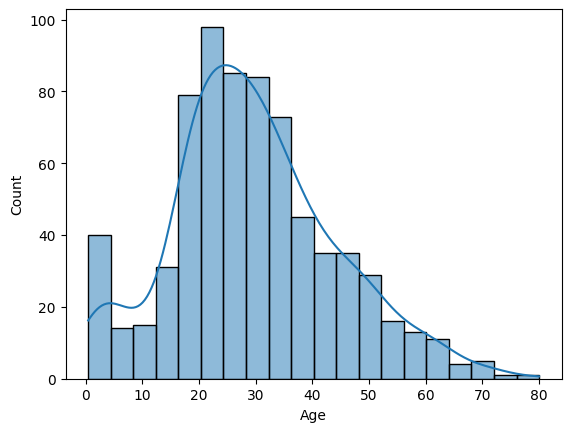

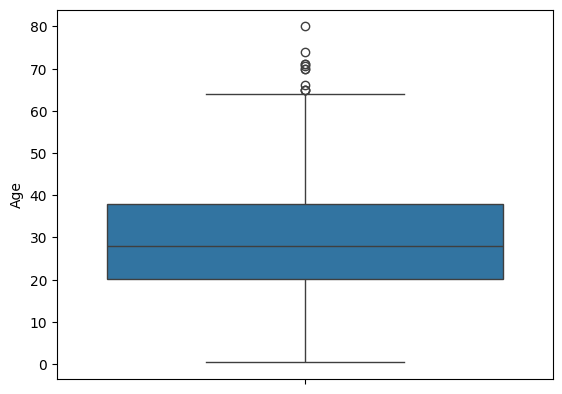


Visualizaciones para la columna:  SibSp


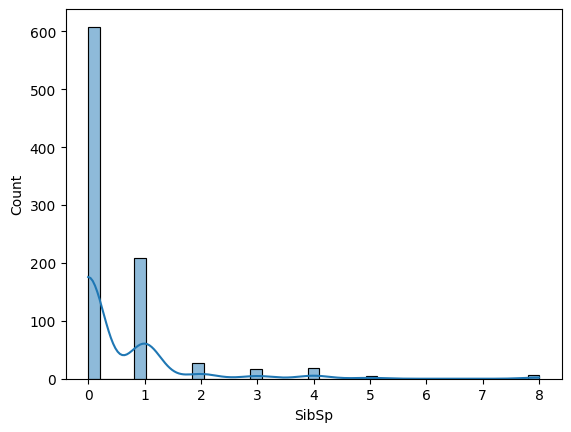

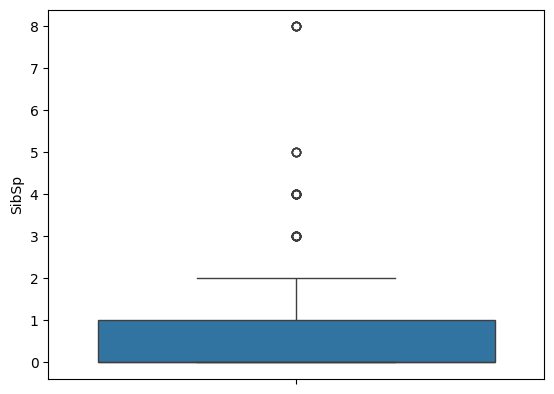


Visualizaciones para la columna:  Parch


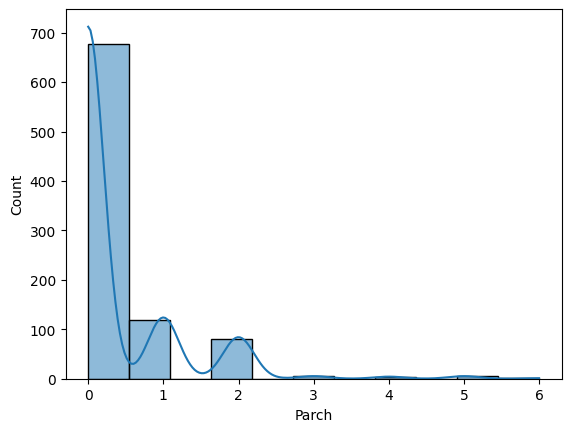

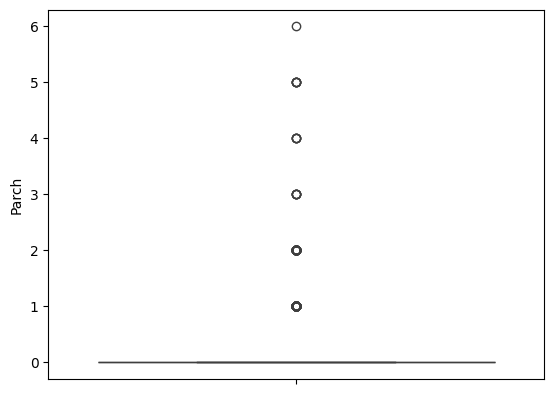


Visualizaciones para la columna:  Fare


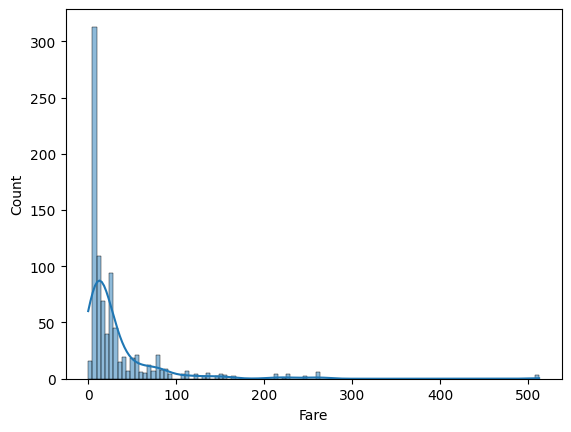

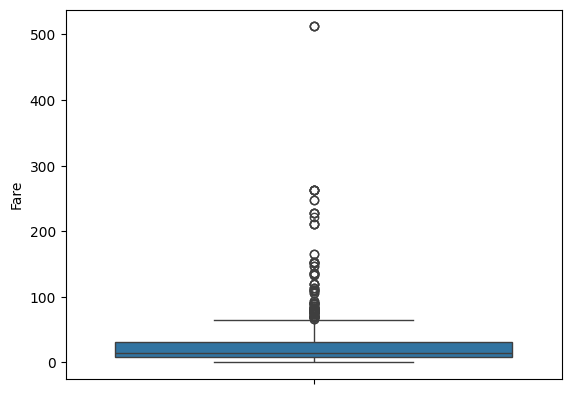

In [25]:
#Columnas numéricas
for col in num_cols:
  print('\nVisualizaciones para la columna: ',col)
  sns.histplot(data[col],kde=True)
  plt.show()
  sns.boxplot(data[col])
  plt.show()

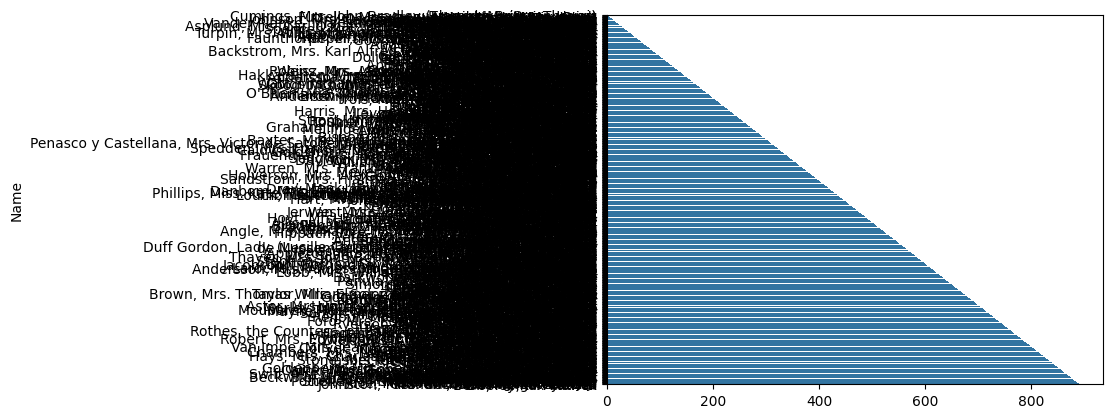

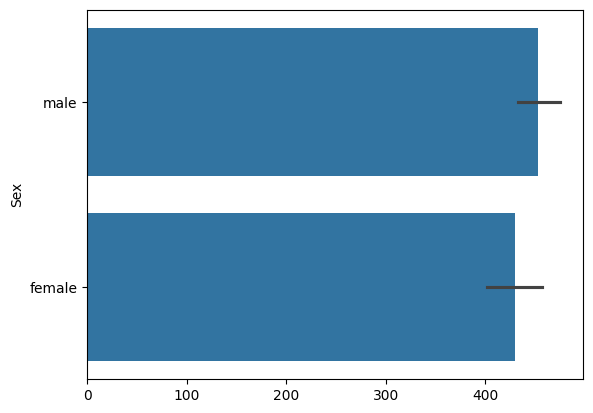

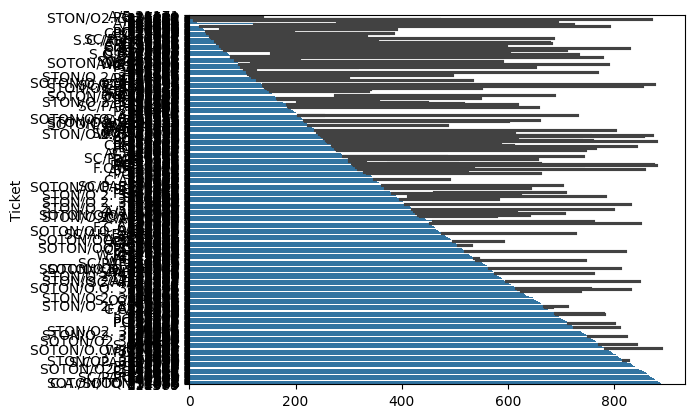

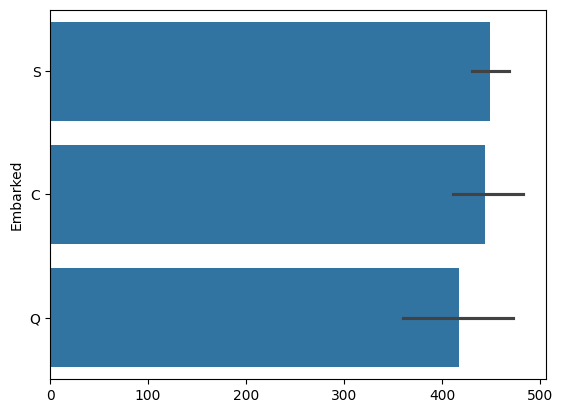

In [26]:
#Columnas categóricas
for c in cat_cols:
  sns.barplot(data[c])
  plt.show()

### DESBALANCEO EN LA VARIABLE OBJETIVO


In [27]:
data.Survived.value_counts() / len(data)

Survived
0    0.616162
1    0.383838
Name: count, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

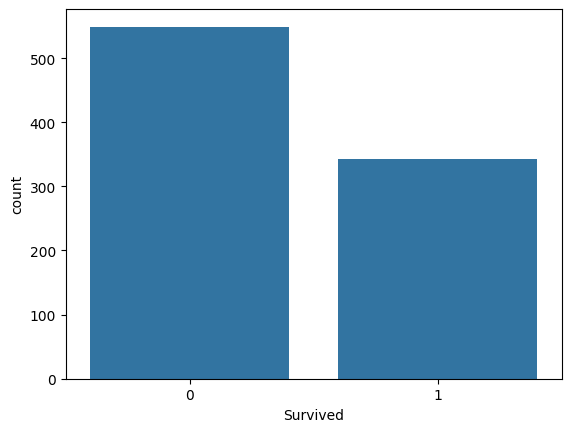

In [28]:
sns.barplot(data['Survived'].value_counts())

Vemos que exite desbalanceo aunque no sea muy severo, pero debemos corregirlo para mejorar la calidad de los datos.


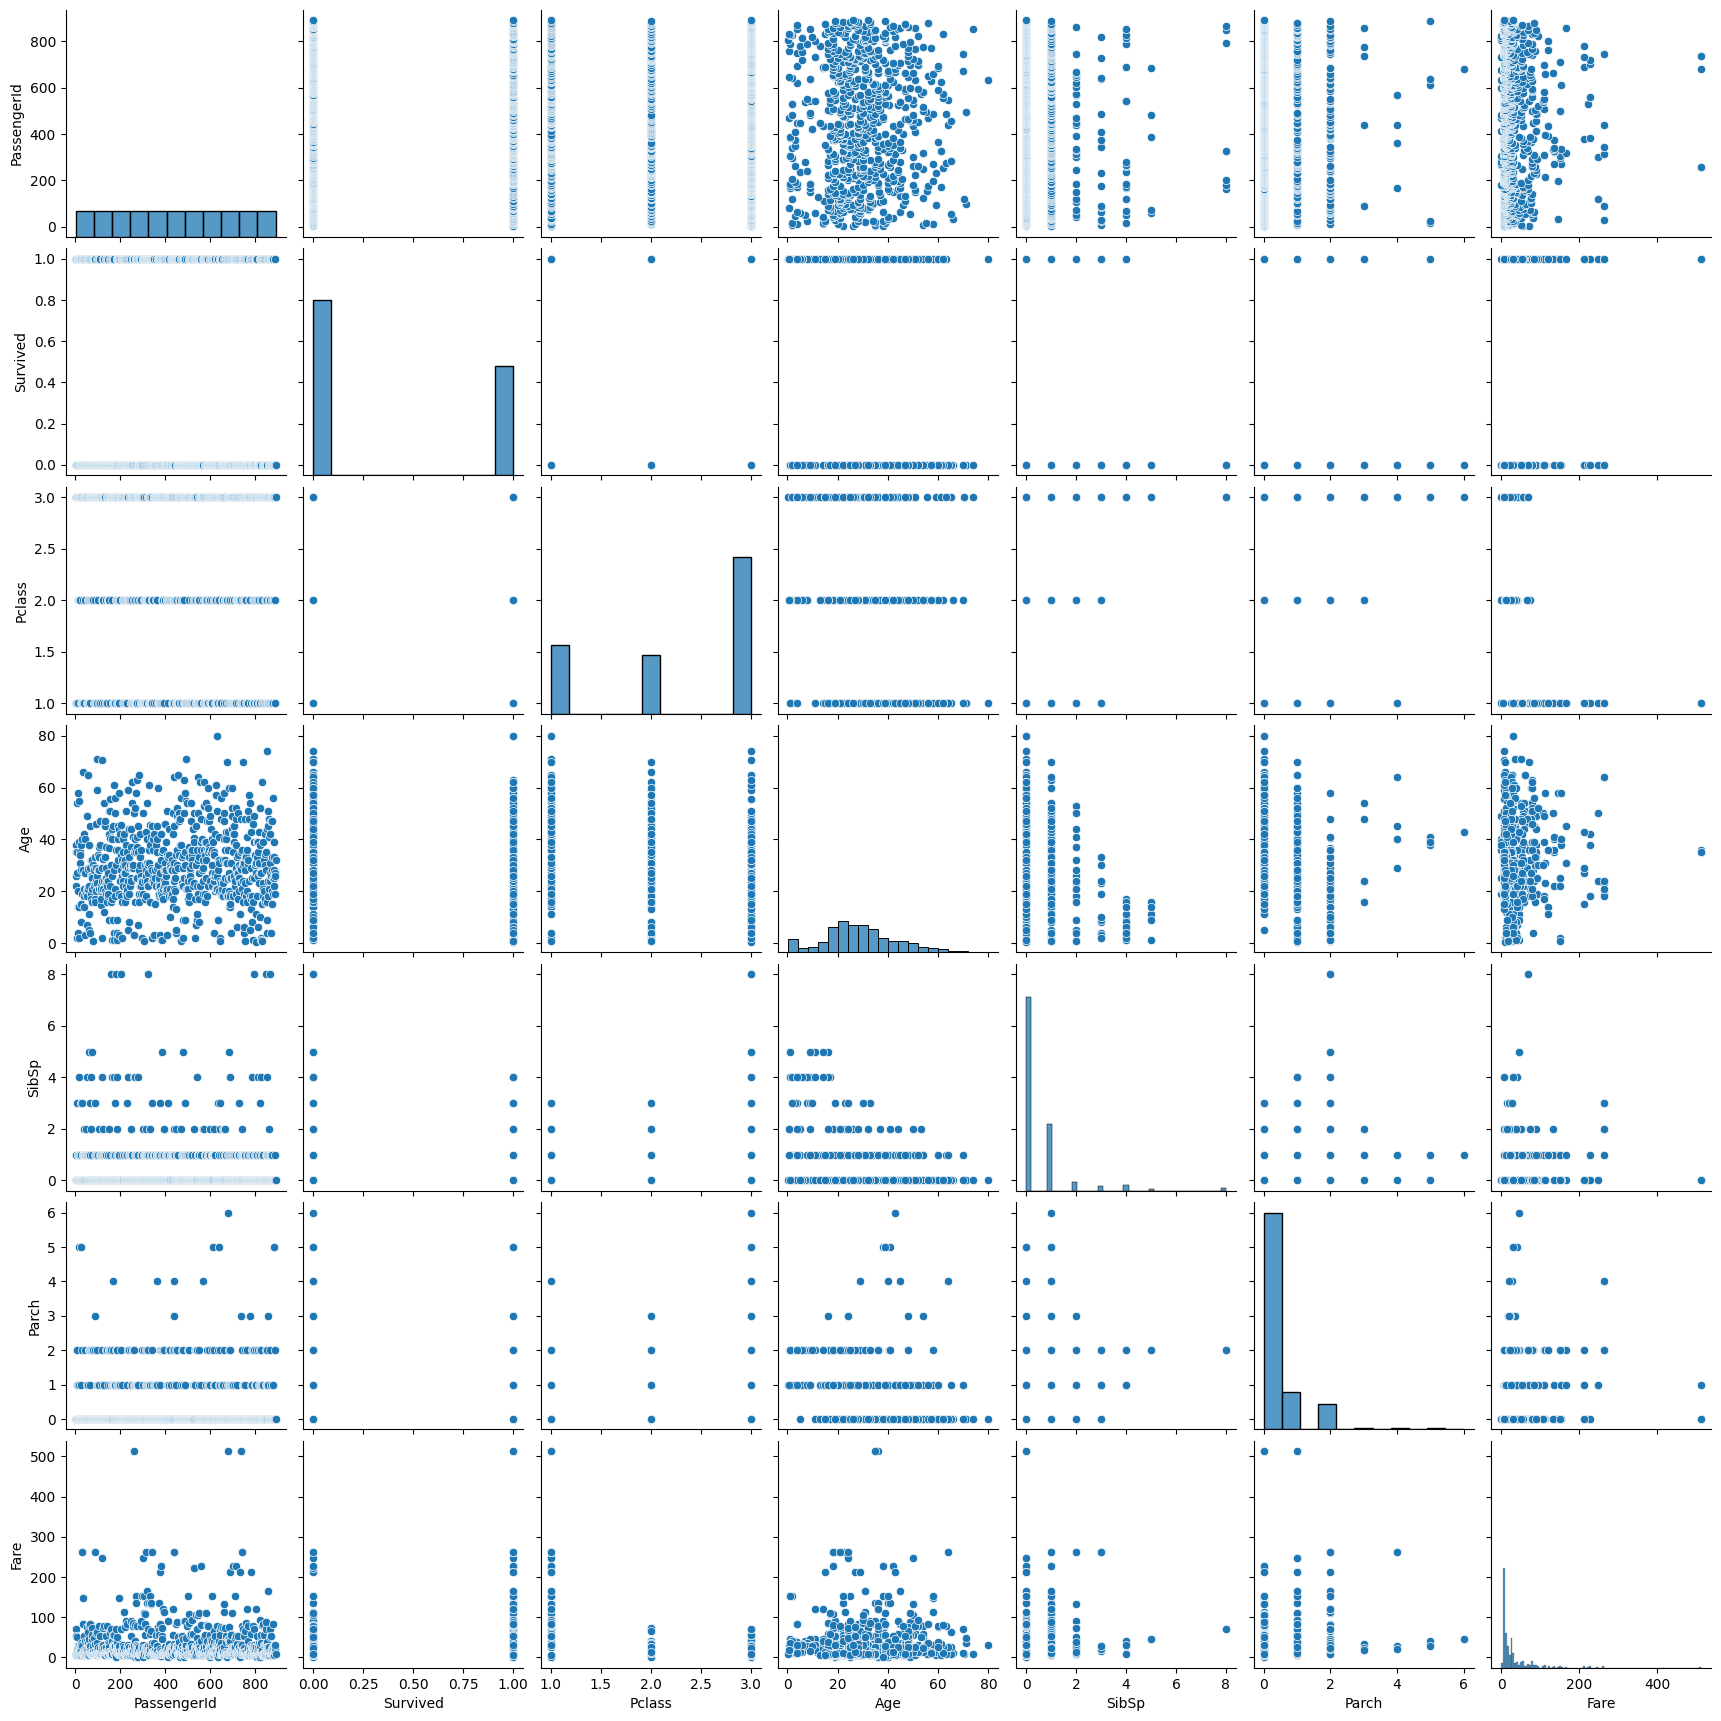

In [29]:
sns.pairplot(data)